# Car Fuel & Emissions

## Wykrywanie elementów nietypowych (odstających) i usuwanie (jeżeli są błędem)

### Wczytywanie danych

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/data.csv')
df = df.loc[(df['fuel_type'] == 'Petrol') | (df['fuel_type'] == 'Diesel')]
before_removing = len(df)

/Users/awysocki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Usunięcie niepotrzebnych kolumn

In [2]:
needed_columns = ['year',
                  'manufacturer',
                  'model',
                  'description',
                  'euro_standard',
                  'transmission_type',
                  'engine_capacity',
                  'fuel_type',
                  'combined_metric',
                  'co2',
                  'co_emissions',
                  'fuel_cost_6000_miles'
                 ]

df = df[needed_columns]
df

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,Manual,1598.0,Petrol,8.2,195,980.0,618.0
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,Manual,1747.0,Petrol,8.4,200,1105.0,633.0
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,Manual,1970.0,Petrol,8.8,210,1103.0,663.0
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,Manual,1598.0,Petrol,8.3,195,980.0,626.0
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,Manual,1747.0,Petrol,8.4,200,1105.0,633.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45506,2013,Volkswagen,New Golf 2013,2.0 TDI 184PS 5 door DSG,6,NaN,1968.0,Diesel,4.7,122,165.0,NaN
45507,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door,6,NaN,1984.0,Petrol,6.0,139,409.0,NaN
45508,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 230PS 3 / 5 door,6,NaN,1984.0,Petrol,6.0,139,409.0,NaN
45509,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door DSG,6,NaN,1984.0,Petrol,6.4,148,357.0,NaN


### rok produkcji (n=1.9)

In [3]:
def n_sigma_detection(df, col_name, n):
    col_data = df[col_name]
    mean_value = col_data.mean()
    std_deviation_value = col_data.std()
    unusual_elements = df.loc[abs(df[col_name] - mean_value) > n * std_deviation_value]
    return unusual_elements

In [4]:
unusual_years = n_sigma_detection(df, 'year', 1.9)
unusual_years.sort_values(by=['year'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,Manual,1598.0,Petrol,8.2,195,980.0,618.0
1158,2000,Renault,Safrane,2.5 20V From VIN B54F02,2,Automatic,2435.0,Petrol,10.7,252,702.0,806.0
1157,2000,Renault,Safrane,2.0 16V From VIN B54L05,2,Manual,1948.0,Petrol,9.1,214,311.0,686.0
1156,2000,Renault,Safrane,2.0 16V From VIN B54L02,2,Automatic,1948.0,Petrol,9.8,231,128.0,739.0
1155,2000,Renault,New Scenic RX4,2.0 16V RX4 From VIN JAAC0E,3,Manual,1998.0,Petrol,9.5,224,492.0,716.0
...,...,...,...,...,...,...,...,...,...,...,...,...
570,2000,Honda,Civic 5 Door (2000 YM),1.6i VTEC SE Executive,3,Automatic,1590.0,Petrol,9.1,214,1093.0,686.0
569,2000,Honda,Civic 5 Door (2000 YM),1.6i VTEC SE Executive,3,Manual,1590.0,Petrol,8.0,190,1275.0,603.0
568,2000,Honda,Civic 5 Door (2000 YM),1.6i VTEC SE,3,Automatic,1590.0,Petrol,9.1,214,1093.0,686.0
579,2000,Honda,Civic Aero Deck (2000 YM),1.6i VTEC SE Executive,3,Automatic,1590.0,Petrol,9.1,214,1093.0,686.0


In [5]:
min_year = df['year'].min()
min_year

2000

In [6]:
max_year = df['year'].max()
max_year

2013

W kolumnie 'year' nie ma elementów nietypowych. Powyższa tabela przedstawia wynik działania metody n-sigma dla n=1.9 (od n=2 tabela jest pusta) - jak widać najbardziej odstająca wartość to 2000, co jest zgodne z zakresem, który zawiera się w badanym zestawie danych (2000-2013).

### standard euro

In [7]:
unusual_euro_standard = n_sigma_detection(df, 'euro_standard', 2.125)
unusual_euro_standard.sort_values(by=['euro_standard'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,Manual,1598.0,Petrol,8.2,195,980.0,618.0
1746,2001,Alfa Romeo,156 Saloon Range,2.0 Selespeed,2,Automatic,1970.0,Petrol,8.5,202,1078.0,616.0
1743,2001,Alfa Romeo,156 Saloon Range,1.8 Twin Spark 16v,2,Manual,1747.0,Petrol,8.2,195,1069.0,595.0
1741,2001,Alfa Romeo,156 Saloon Range,1.6 Twin Spark 16v,2,Manual,1598.0,Petrol,8.2,195,919.0,595.0
1733,2000,Volvo,S80 Model Year 2001,2.5 D,2,Automatic,2461.0,Diesel,7.4,196,160.0,571.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45245,2013,BMW,"1 Series 5-door F20, From September 2011",118i 5-door - 225/45 R17 tyres front and rear,6,NaN,1598.0,Petrol,5.8,134,293.0,NaN
45244,2013,BMW,"1 Series 5-door F20, From September 2011",118i 5-door - 205/50 R17 tyres front and rear,6,NaN,1598.0,Petrol,5.8,134,293.0,NaN
45243,2013,BMW,"1 Series 5-door F20, From September 2011",116i 5-door - 225/40 R18 tyres front / 245/35 ...,6,NaN,1598.0,Petrol,5.8,134,313.0,NaN
45265,2013,BMW,"3 Series Gran Turismo F34, From June 2013",328i Gran Turismo - 225/45 R19 tyres front / 2...,6,NaN,1997.0,Petrol,6.5,151,264.0,NaN


In [8]:
min_euro_standard = df['euro_standard'].min()
min_euro_standard

2

In [9]:
max_euro_standard = df['euro_standard'].max()
max_euro_standard

6

W kolumnie 'euro_standard' również nie ma elementów nietypowych. Powyższa tabela przedstawia wynik działania metody n-sigma dla n=2.125 - wszystkie skrajne elementy to 2 lub 6, czyli poprawne wartości

### pojemność silnika

#### a. benzyna (n=4)

In [10]:
df_petrol = df.loc[df['fuel_type'] == 'Petrol']
unusual_petrol_engine_capacity = n_sigma_detection(df_petrol, 'engine_capacity', 4)
unusual_petrol_engine_capacity.sort_values(by=['engine_capacity'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
45496,2013,Rolls-Royce,Ghost,Ghost EWB,6,NaN,6592.0,Petrol,14.1,329,190.0,NaN
36649,2011,Rolls-Royce,Ghost,Ghost,5,Automatic,6592.0,Petrol,13.6,317,231.0,NaN
32571,2010,Rolls-Royce,Ghost,Ghost,5,Automatic,6592.0,Petrol,13.6,317,231.0,NaN
45495,2013,Rolls-Royce,Ghost,Ghost,6,NaN,6592.0,Petrol,14.0,327,190.0,NaN
40024,2012,Rolls-Royce,Ghost,Ghost,5,Automatic,6592.0,Petrol,13.6,317,231.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
190,2000,Chrysler Jeep,Chrysler Viper (99 Model Year),8.0L V10 GTS Coupé & RT/10 Roadster,2,Manual,7990.0,Petrol,20.2,483,960.0,1520.0
26656,2009,Dodge,SRT10,Cabriolet,4,Manual,8285.0,Petrol,21.1,488,796.0,NaN
23137,2008,Dodge,SRT10,Cabriolet,4,Manual,8285.0,Petrol,21.1,488,796.0,NaN
20044,2007,Dodge,SRT10,Cabriolet,4,Manual,8285.0,Petrol,21.1,488,796.0,NaN


Jeżeli chodzi o samochody z silnikmiem benzynowym, to wszystko wydaje się być w porządku. Samochody, które znajdują się na powyższej liście rzeczywiście istnieją, a deklarowane wartości w kolumnie 'engine_capacity' są poprawne. Jak widać są to samochody drogie i o dużych mocach, więc wysoka pojemność silnika jest uzasadniona.

In [11]:
df_petrol.sort_values(by='engine_capacity').head(5)

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
45356,2013,Chrysler Jeep,"Jeep Compass, MY2014",2.4 4x4,6,NaN,209.0,Petrol,9.0,209,366.0,NaN
2872,2001,Micro Compact Car,MCC Smart City Coupe Hatchback,Smart and Passion,3,Automatic,599.0,Petrol,4.9,118,343.0,355.0
8265,2003,Smart,Smart Cabrio Hatchback (03MY),Smart Cabrio and Pulse,3,Automatic,599.0,Petrol,4.7,113,500.0,327.0
8266,2003,Smart,Smart Cabrio Hatchback (03MY),Smart Cabrio and Pulse,3,Automatic,599.0,Petrol,4.9,118,300.0,341.0
14574,2005,Smart,Smart Cabrio Hatchback,Crossblade,3,Automatic,599.0,Petrol,5.7,136,523.0,NaN


Dodtkowo sprawdziliśmy również najmniejsze elementy w tej kolumnie i okazało się, że jeden z wpisów jest błędny - <b>45356</b>. Pojemność silnika jest zbyt mała oraz widać, że podczas wprowadzania danych omyłkowo wpisano taką samą wartość w polu 'engine_capacity' oraz 'co2'. Uznajemy ten rekord za błąd i usuwamy.

In [12]:
to_be_droped = [45356]
df = df.drop(to_be_droped)
df_petrol = df_petrol.drop(to_be_droped)

#### b. olej napędowy  (n=4)

In [13]:
df_diesel = df.loc[df['fuel_type'] == 'Diesel']
unusual_petrol_engine_capacity = n_sigma_detection(df_diesel, 'engine_capacity', 4)
unusual_petrol_engine_capacity.sort_values(by=['engine_capacity'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
43145,2013,Mercedes-Benz,"R-Class, Model Year 2013","R 350 CDI with 18"", 19"", 20"" & 21"" rear wheels",5,Automatic,3987.0,Diesel,8.5,223,299.0,NaN
848,2000,Mercedes-Benz,S-Class (V220),S 400 CDI Limousine,2,Automatic,3996.0,Diesel,10.0,253,307.0,774.0
20865,2007,Mercedes-Benz,GL-Class (X164) Estate,"GL420 CDI 4MATIC with DPF 275/295 Tyres on 20""...",4,Automatic,3996.0,Diesel,11.8,313,90.0,NaN
20866,2007,Mercedes-Benz,GL-Class (X164) Estate,"GL420 CDI 4MATIC with DPF 275 Tyres on 19"" whe...",4,Automatic,3996.0,Diesel,11.6,307,90.0,NaN
20882,2007,Mercedes-Benz,M-Class (W164) Estate,ML 420CDI 4MATIC with DPF 255 Tyres at rear,4,Automatic,3996.0,Diesel,11.1,294,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29319,2009,Volkswagen,Touareg,R50 - 5.0 V10 TDI (350 PS) with DPF,4,Automatic,4921.0,Diesel,11.9,315,284.0,NaN
8758,2003,Volkswagen,Touareg,V10,3,Automatic,4921.0,Diesel,12.3,332,300.0,889.0
29318,2009,Volkswagen,Touareg,5.0 TDI V10 (313 PS) Tiptronic with DPF,4,Automatic,4921.0,Diesel,11.9,315,424.0,NaN
34213,2011,Audi,Q7,6.0 V12 TDI quattro 500PS Tiptronic,5,Automatic,5934.0,Diesel,11.3,298,314.0,NaN


Jak widać samochody z silnikmiem na olej napędowy nie osiągają takich pojemności jak samochody na benzynę (nawet ponad 8 litrów). W tym przypadku największe pojemności posiada Audi Q7, które ma podejrzanie wysoką (w porównaniu do innych skrajnych dieslów) wartość, bo aż o <b>1 litr</b> większą od poprzedniego w zbiorze Volkswagen	Touareg'a. Po zweryfikowaniu okazało się jednak, że jest to wartość poprawna.

In [14]:
df_diesel.sort_values(by='engine_capacity').head(5)

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
32987,2010,Smart,Fortwo Cabrio Model Year 2009,"cdi no DPF 175/195 Tyres on 15"" Wheels at rear",4,Automatic,799.0,Diesel,3.3,88,174.0,NaN
28629,2009,Smart,Fortwo Coupé,fortwo coupé cdi no DPF 33kW,4,Automatic,799.0,Diesel,3.3,88,174.0,NaN
28622,2009,Smart,Fortwo Cabrio,fortwo cabrio cdi no DPF 33kW,4,Automatic,799.0,Diesel,3.3,88,174.0,NaN
890,2000,Micro Compact Car,MCC Smart City Coupe,Smart CDI Hatchback,2,Automatic,799.0,Diesel,3.4,90,201.0,263.0
2879,2001,Micro Compact Car,MCC Smart City Coupe Hatchback,Smart CDI,3,Automatic,799.0,Diesel,3.4,90,158.0,256.0


Najmniejsze pojemości samochodów z silnikiem Diesla wyglądają w porządku (najmniejsze mają około 0.8L).

### spalanie w cyklu mieszanym

#### a. benzyna (n=6)

In [15]:
unusual_petrol_combined_metric = n_sigma_detection(df_petrol, 'combined_metric', 5)
unusual_petrol_combined_metric.sort_values(by=['combined_metric'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
35395,2011,Lamborghini,"Murcielago, Model Year 2007",147 Roadster,4,Manual,6496.0,Petrol,21.3,495,630.0,NaN
35394,2011,Lamborghini,"Murcielago, Model Year 2007",147 Coupé,4,Manual,6496.0,Petrol,21.3,495,630.0,NaN
20045,2007,Ferrari,All Models,599 GTB Fiorano,4,Manual,5999.0,Petrol,21.3,490,620.0,NaN
20406,2007,Lamborghini,Murcielago Model Year 2007,147 Roadster,4,Manual,6496.0,Petrol,21.3,495,630.0,NaN
23542,2008,Lamborghini,Murcielago Model Year 2007,147 Coupé,4,Manual,6496.0,Petrol,21.3,495,630.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4267,2002,Ferrari,All Models,456M GTA 2+2,3,Automatic,5474.0,Petrol,25.0,570,160.0,1738.0
9551,2004,Ferrari,All Models,456M GTA 2+2,3,Automatic,5474.0,Petrol,25.0,570,200.0,1738.0
2173,2001,Ferrari,All Models,456M GTA 2+2,3,Automatic,5474.0,Petrol,25.0,570,160.0,1810.0
696,2000,Lamborghini,Diablo Model Year 1997,Diablo 132 SE,2,Manual,5707.0,Petrol,25.4,590,1020.0,1934.0


W tym przypadku skrajne elementy kolumny spalania mieszanego wydają się być poprawne. Są to dosyć wysokie wartości (ponad 21 litrów na 100 km), ale samochody przedstawione w powyższej tabeli to w większości sportowe Ferrari i Lamborghini, więc takie spalania są w pełniu uzasadnione.

#### b. olej napędowy (n=3.5)

In [16]:
unusual_diesel_combined_metric = n_sigma_detection(df_diesel, 'combined_metric', 3.5)
unusual_diesel_combined_metric.sort_values(by=['combined_metric'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
199,2000,Chrysler Jeep,Jeep Grand Cherokee (00 Model Year),3.1Td,3,Automatic,3124.0,Diesel,11.7,308,42.0,905.0
2009,2001,Chrysler Jeep,Jeep Grand Cherokee (01 Model Year),3.1Td,3,Automatic,3124.0,Diesel,11.7,308,42.0,883.0
26410,2009,Chrysler Jeep,08MY Jeep Cherokee (KK),2.8 Auto (no DPF),4,Automatic,2777.0,Diesel,11.7,242,30.0,NaN
27864,2009,Nissan,Patrol,3.0 DI,4,Automatic,2953.0,Diesel,11.8,313,30.0,NaN
24187,2008,Nissan,Patrol,3.0 DI,4,Automatic,2953.0,Diesel,11.8,313,30.0,NaN
24009,2008,Mercedes-Benz,GL-Class (X164) Estate,"GL420 CDI with 275 Tyres 20"" Wheels at rear",4,Automatic,3996.0,Diesel,11.8,313,90.0,NaN
20865,2007,Mercedes-Benz,GL-Class (X164) Estate,"GL420 CDI 4MATIC with DPF 275/295 Tyres on 20""...",4,Automatic,3996.0,Diesel,11.8,313,90.0,NaN
27691,2009,Mercedes-Benz,GL-Class (X164) Estate,"GL420 CDI 4MATIC with DPF 275/295 Tyres on 20""...",4,Automatic,3996.0,Diesel,11.8,313,90.0,NaN
31874,2010,Mercedes-Benz,GL-Class (164) Model Year 2009,"GL420 CDI 4MATIC with DPF 275/295 tyres on 20""...",4,Automatic,3996.0,Diesel,11.8,313,90.0,NaN
31884,2010,Mercedes-Benz,GL-Class Model Year 2010,"GL 450 CDI 4MATIC with 275/50 20"" or 295/40 21...",4,Automatic,3996.0,Diesel,11.8,313,90.0,NaN


W tym przypadku ewidentnie mamy do czynienia z błędnym pomiarem. Ostatnie dwa samochody na liście mają splanie <b>35.8 L/100km i 44.0 L/100km</b>. Są to dwa 'rodzinne' samochody - Kia	Sorento	i Mercedes-Benz	B-Class. Przepaść pomiędzy nimi a wcześniejszym w tabeli Volkswagen	Touareg to ponad 20 L/100 km. Nawet sportowe Lamborghini i Ferrari nie osiągały takich spalań, więc powyższe dwa samochody uznajemy za będny pomiar i usuwamy ze zbioru (zbiór jest na tyle duży i różnorodny, że praktycznie nie wpłynie to na wynik klasteryzacji i klasyfikacji).

In [17]:
to_be_droped = [20390, 42908]
df = df.drop(to_be_droped)
df_diesel = df_diesel.drop(to_be_droped)

### emisja CO2

#### a. benzyna (n=5)

In [18]:
unusual_petrol_co2 = n_sigma_detection(df_petrol, 'co2', 5)
unusual_petrol_co2.sort_values(by=['co2'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
32,2000,Aston Martin Lagonda,Aston Martin,"Vantage Petrol, Supercharged",2,Manual,5340.0,Petrol,21.5,511,960.0,1624.0
2563,2001,Lamborghini,Diablo Model Year 2001,Roadster L144,4,Manual,5992.0,Petrol,21.8,520,NaN,1574.0
4618,2002,Lamborghini,Diablo Model Year 2001,132,4,Manual,5992.0,Petrol,21.8,520,NaN,NaN
4619,2002,Lamborghini,Diablo Model Year 2002,132 SE,4,Manual,5992.0,Petrol,21.8,520,NaN,NaN
4620,2002,Lamborghini,Diablo Model Year 2003,Roadster L144,4,Manual,5992.0,Petrol,21.8,520,NaN,NaN
6953,2003,Lamborghini,Diablo Model Year 2001,132,4,Manual,5992.0,Petrol,21.8,520,NaN,1511.0
6954,2003,Lamborghini,Diablo Model Year 2001,132 SE,4,Manual,5992.0,Petrol,21.8,520,NaN,1511.0
6955,2003,Lamborghini,Diablo Model Year 2001,Roadster L144,4,Manual,5992.0,Petrol,21.8,520,NaN,1511.0
9996,2004,Lamborghini,Diablo Model Year 2001,132,4,Manual,5992.0,Petrol,21.8,520,NaN,1511.0
9997,2004,Lamborghini,Diablo Model Year 2001,132 SE,4,Manual,5992.0,Petrol,21.8,520,NaN,1511.0


#### b. olej napędowy (n=4)

In [19]:
unusual_diesel_co2 = n_sigma_detection(df_diesel, 'co2', 4 )
unusual_diesel_co2.sort_values(by=['co2'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
11979,2004,Volkswagen,Touareg,V10,3,Automatic,4921.0,Diesel,12.2,329,300.0,882.0
8758,2003,Volkswagen,Touareg,V10,3,Automatic,4921.0,Diesel,12.3,332,300.0,889.0
15749,2005,Volkswagen,Touareg,5.0 V10 TDI (313 PS),3,Automatic,4921.0,Diesel,12.3,332,261.0,NaN
19267,2006,Volkswagen,Touareg,5.0 V10 TDI (313 PS),3,Automatic,4921.0,Diesel,12.3,332,261.0,NaN
36160,2011,Nissan,Primastar,2.5 dCi SWB 9 Seat Minibus,4,Manual,2464.0,Diesel,8.8,332,483.0,NaN
25497,2008,Volkswagen,Touareg,5.0 TDI V10 (313 PS) Tiptronic with DPF,4,Automatic,4921.0,Diesel,12.6,333,424.0,NaN
1390,2000,Toyota,Landcruiser,4.2 TD Auto,2,Automatic,4164.0,Diesel,12.6,340,170.0,974.0
3574,2001,Toyota,Landcruiser,4.2 24v TD Auto,2,Automatic,4164.0,Diesel,12.6,340,170.0,950.0
5575,2002,Toyota,Landcruiser,Amazon 4.2 24v TD Auto,3,Automatic,4164.0,Diesel,12.6,340,300.0,913.0
11330,2004,Toyota,Land Cruiser,Amazon 4.2 24v TD Auto,3,Automatic,4164.0,Diesel,12.6,340,300.0,913.0


Najbardziej odstające samochody z silnikami diesla charakteryzują się dużo niższą emisyjnością co2, niż najbardziej odstające samochody z silnikami benzynowymi.

### emisja CO

#### a. benzyna (n=3)

In [20]:
unusual_petrol_co = n_sigma_detection(df_petrol, 'co_emissions', 3)
unusual_petrol_co.sort_values(by=['co_emissions'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
12370,2005,Audi,Audi TT (Coupé),1.8 T quattro (225 PS),3,Manual,1781.0,Petrol,9.4,226,73000.0,NaN
12376,2005,Audi,Audi TT (Roadster),1.8 T quattro (225 PS),3,Manual,1781.0,Petrol,9.5,228,73000.0,NaN
12369,2005,Audi,Audi TT (Coupé),1.8 T quattro (180 PS),3,Manual,1781.0,Petrol,9.5,228,74000.0,NaN
12375,2005,Audi,Audi TT (Roadster),1.8 T quattro (180 PS),3,Manual,1781.0,Petrol,9.6,230,74000.0,NaN


Jak widać, po raz kolejny mamy do czynienia z błędem. Emisje co na poziomie > 70000 są wręcz niemożliwe i należy je wyeliminować ze zbioru.

In [21]:
to_be_droped = [12370, 12376, 12369, 12375]
df = df.drop(to_be_droped)
df_petrol = df_petrol.drop(to_be_droped)

Po usunięciu sprawdzamy jeszcze raz.

In [22]:
unusual_petrol_co = n_sigma_detection(df_petrol, 'co_emissions', 3)
unusual_petrol_co.sort_values(by=['co_emissions'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
167,2000,BMW,5 Series E39,M5 Saloon,3,Manual,4941.0,Petrol,13.9,336,1248.0,1048.0
1983,2001,BMW,Z8 Series E52,Z8,3,Manual,4941.0,Petrol,14.9,358,1249.0,1077.0
175,2000,BMW,Z8 Series E52,Z8,3,Manual,4941.0,Petrol,14.5,349,1249.0,1091.0
4122,2002,BMW,Z8 Series E52,Z8,3,Manual,4941.0,Petrol,14.9,358,1249.0,1034.0
4113,2002,BMW,5 Series E39,M5 Saloon,3,Manual,4941.0,Petrol,14.4,346,1249.0,1002.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2004,Lotus,Esprit,Esprit V8 GT,3,Manual,3506.0,Petrol,15.7,366,2000.0,1091.0
8411,2003,Toyota,Land Cruiser,Amazon 4.7i V8,3,Automatic,4664.0,Petrol,16.3,387,2000.0,1135.0
21716,2007,Toyota,Land Cruiser,Amazon 4.7i V8,3,Automatic,4664.0,Petrol,16.3,387,2000.0,NaN
10031,2004,Lotus,Esprit,Esprit V8,3,Manual,3506.0,Petrol,15.7,366,2000.0,1091.0


Tym razem elementy najbardziej odstające elementy to po raz kolejny poprostu samochody o dużych mocach i objętościach silników, więc przyjmujemy, że emisja co na poziomie do 2000 jest wartością poprawną.

#### a. olej napędowy (n=3)

In [23]:
unusual_diesel_co = n_sigma_detection(df_diesel, 'co_emissions', 3)
unusual_diesel_co.sort_values(by=['co_emissions'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
12339,2005,Audi,A8,4.0 TDI V8 quattro (275 PS) LWB,3,Automatic,3936.0,Diesel,9.8,265,70000.0,NaN
12340,2005,Audi,A8,4.0 V8 TDI quattro (275 PS),3,Automatic,3936.0,Diesel,9.8,265,70000.0,NaN
12352,2005,Audi,Audi Allroad (Up to June 2005),2.5 TDI V6 quattro (180 PS),3,Automatic,2496.0,Diesel,9.5,257,71000.0,NaN
12353,2005,Audi,Audi Allroad (Up to June 2005),2.5 TDI V6 quattro (180 PS)(Low & High Ratio T...,3,Manual,2496.0,Diesel,8.8,238,72000.0,NaN
12351,2005,Audi,Audi Allroad (Up to June 2005),2.5 TDI V6 quattro (163 PS),3,Manual,2496.0,Diesel,8.8,238,75000.0,NaN


Podobnie jak z samochodami na benzynę, wystąpiły dokładnie takie same elementy odstające - również samochody marki Audi. Są to ewidentne błędy, które usuwamy.

In [24]:
to_be_droped = [12339, 12340, 12352, 12353, 12351]
df = df.drop(to_be_droped)
df_diesel = df_diesel.drop(to_be_droped)

Po usunięciu sprawdzamy jeszcze raz.

In [25]:
unusual_diesel_co = n_sigma_detection(df_diesel, 'co_emissions', 3)
unusual_diesel_co.sort_values(by=['co_emissions'])

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
11491,2004,Vauxhall,"Astra, Model Year 2003","2.0 DTI 5 Door Estate, From VIN: W0L0TGF353800...",3,Manual,1686.0,Diesel,6.9,186,-200.0,500.0
13313,2005,Land Rover,Discovery 3,2.7 V6,3,Manual,2720.0,Diesel,9.4,249,608.0,NaN
4273,2002,Fiat,Doblo Range,1.9 JTD,3,Manual,1910.0,Diesel,6.4,168,611.0,464.0
2540,2001,Kia,Sedona,2.9 TDI,2,Automatic,2902.0,Diesel,9.1,240,620.0,686.0
689,2000,Kia,Sedona,2.9 TDI S/SX/GSX/Executive,2,Automatic,2902.0,Diesel,9.1,240,620.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2385,2001,Ford,Transit Tourneo SWB Bus,2.5 Di Diesel (76PS) 4.11 FDR,2,Manual,2496.0,Diesel,8.3,218,1274.0,626.0
508,2000,Ford,Transit Tourneo SWB Bus,2.5 Di Diesel (76PS) 4.11 FDR,2,Manual,2496.0,Diesel,8.3,218,1274.0,642.0
443,2000,Ford,Galaxy,1.9 Turbo Diesel (115PS),2,Automatic,1896.0,Diesel,7.8,211,1390.0,603.0
2317,2001,Ford,Galaxy,1.9 Turbo Diesel (115PS),2,Automatic,1896.0,Diesel,7.8,211,1390.0,588.0


Jak widać pozostałe wyniki (poza pierwszym na liście) wyglądają w porządku. Pierwszy element jest ewidentnym błędem. Zauważyliśmy również, że niektóre samochody mają bardzo niskie emisje co, zupełnie nie pasujące do samochodów o podobnym profilu. Prawdopodobnie jest to spowodowane wpisem w nieodpowiednim rzędzie jednostek. Przyjęliśmy, że błędne rekordy to takie, których emisje są mniejsze niż 2.

In [26]:
invalid_co_emissions = df.loc[df['co_emissions'] < 2]
invalid_co_emissions

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles
816,2000,Mercedes-Benz,E-Class (S210),E 240 Estate,2,Automatic,2597.0,Petrol,10.6,254,1.000,800.0
828,2000,Mercedes-Benz,E-Class (W210),E 240 Saloon,2,Automatic,2597.0,Petrol,10.3,247,1.000,776.0
829,2000,Mercedes-Benz,E-Class (W210),E 280 Saloon,2,Manual,2799.0,Petrol,10.8,259,1.000,812.0
832,2000,Mercedes-Benz,E-Class (W210),E 320 Saloon,2,Automatic,3199.0,Petrol,10.3,247,1.000,776.0
844,2000,Mercedes-Benz,New C-Class (W 203),C 240 Saloon,2,Manual,2597.0,Petrol,10.8,259,1.000,812.0
850,2000,Mercedes-Benz,S-Class (V220),S 500 (ZEV) Limousine,2,Automatic,4966.0,Petrol,12.5,299,1.000,941.0
854,2000,Mercedes-Benz,S-Class (W220),S 280 Saloon,2,Automatic,2799.0,Petrol,11.5,276,1.000,865.0
858,2000,Mercedes-Benz,S-Class (W220),S 430 Saloon,2,Automatic,4266.0,Petrol,12.3,294,1.000,925.0
859,2000,Mercedes-Benz,S-Class (W220),S 500 (ZEV) Saloon,2,Automatic,4966.0,Petrol,12.5,299,1.000,941.0
870,2000,Mercedes-Benz,SLK-Class (R170),SLK 320 Coupé/Roadster,3,Manual,3199.0,Petrol,11.1,267,1.000,838.0


In [27]:
invalid_co_emissions_indexes = list(invalid_co_emissions.index.values)
df = df.drop(invalid_co_emissions_indexes)

### Podsumowując, podczas analizy elementów nietypowych, wykryto (i usunięto) następującą liczbę błędnych rekordów:

In [28]:
before_removing - len(df)

39

## Klasteryzacja

### Wybór interesujących nas atrybutów

Klasteryzacja przeprowadzona zostanie na podstawie 3 parametrów - pojemność silnika, spalanie (cykl mieszany), emisja co2.

In [29]:
colums_for_clusterization = ['engine_capacity', 'combined_metric', 'co2']
df_clusterization = df[colums_for_clusterization]
df_clusterization

,engine_capacity,combined_metric,co2
0,1598.0,8.2,195
1,1747.0,8.4,200
2,1970.0,8.8,210
3,1598.0,8.3,195
4,1747.0,8.4,200
...,...,...,...
45506,1968.0,4.7,122
45507,1984.0,6.0,139
45508,1984.0,6.0,139
45509,1984.0,6.4,148


### Normalizacja

In [30]:
df_clusterization = df_clusterization.apply(lambda x: x / x.max(), axis=0)
df_clusterization

,engine_capacity,combined_metric,co2
0,0.192879,0.322835,0.330508
1,0.210863,0.330709,0.338983
2,0.237779,0.346457,0.355932
3,0.192879,0.326772,0.330508
4,0.210863,0.330709,0.338983
...,...,...,...
45506,0.237538,0.185039,0.206780
45507,0.239469,0.236220,0.235593
45508,0.239469,0.236220,0.235593
45509,0.239469,0.251969,0.250847


### Redukcja do dwóch wymiarów - w celu narysowania wykresu 2D i wydedukowania ilości klastrów

<AxesSubplot:xlabel='PC-1', ylabel='PC-2'>

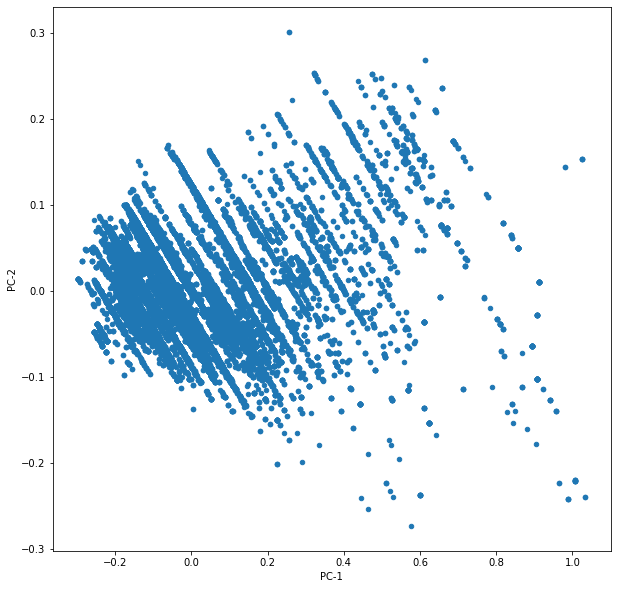

In [31]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10, 10]

def prepare_principal_component_names(prefix='PC', size=1):
    return [prefix + '-' + str(i) for i in range(1, size + 1)]

def reduce_dim(data,n_components):
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit(data)
    principalComponents = pca.transform(data)
    comp_names = prepare_principal_component_names(size=n_components)
    principalDf = pd.DataFrame(data = principalComponents, columns = comp_names)
    return principalDf

reduced_df_to_2d = reduce_dim(df_clusterization, 2)
reduced_df_to_2d.plot(kind='scatter',x='PC-1',y='PC-2')

Niestety, po zredukowaniu do dwóch wymiarów nie widać, aby nasz zbiór formował rozdzielne klastry. Z tego powodu, przyjmiemy następującą liczbę klastrów i sprawdzimy jakie samochody znajdują się w poszczególnych klastrach.

In [32]:
num_of_clusters = 4

### Wyznaczanie klastrów metodą k-średnich (KMeans)

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_of_clusters)
model = kmeans.fit(df_clusterization)
labels = model.labels_

df_clusterization['class'] = labels
df_clusterization

,engine_capacity,combined_metric,co2,class
0,0.192879,0.322835,0.330508,3
1,0.210863,0.330709,0.338983,3
2,0.237779,0.346457,0.355932,3
3,0.192879,0.326772,0.330508,3
4,0.210863,0.330709,0.338983,3
...,...,...,...,...
45506,0.237538,0.185039,0.206780,0
45507,0.239469,0.236220,0.235593,0
45508,0.239469,0.236220,0.235593,0
45509,0.239469,0.251969,0.250847,0


Po wyznaczeniu klas, uzupełniamy nasz bazowy zbiór danych o znormalizowane kolumny oraz klasę.

In [34]:
df_clusterization = df_clusterization.rename(columns = {'engine_capacity': 'n_engine_capacity', 'combined_metric': 'n_combined_metric', 'co2': 'n_co2'})
df = pd.merge(df, df_clusterization, left_index=True, right_index=True)
df

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles,n_engine_capacity,n_combined_metric,n_co2,class
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,Manual,1598.0,Petrol,8.2,195,980.0,618.0,0.192879,0.322835,0.330508,3
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,Manual,1747.0,Petrol,8.4,200,1105.0,633.0,0.210863,0.330709,0.338983,3
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,Manual,1970.0,Petrol,8.8,210,1103.0,663.0,0.237779,0.346457,0.355932,3
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,Manual,1598.0,Petrol,8.3,195,980.0,626.0,0.192879,0.326772,0.330508,3
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,Manual,1747.0,Petrol,8.4,200,1105.0,633.0,0.210863,0.330709,0.338983,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45506,2013,Volkswagen,New Golf 2013,2.0 TDI 184PS 5 door DSG,6,NaN,1968.0,Diesel,4.7,122,165.0,NaN,0.237538,0.185039,0.206780,0
45507,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door,6,NaN,1984.0,Petrol,6.0,139,409.0,NaN,0.239469,0.236220,0.235593,0
45508,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 230PS 3 / 5 door,6,NaN,1984.0,Petrol,6.0,139,409.0,NaN,0.239469,0.236220,0.235593,0
45509,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door DSG,6,NaN,1984.0,Petrol,6.4,148,357.0,NaN,0.239469,0.251969,0.250847,0


### Tasowanie danych

In [35]:
df = df.sample(frac = 1)

### Zaznaczenie klastrów na wykresach 

In [36]:
colors = ['red', 'green', 'blue', 'black', 'purple', 'pink']

def plot_2d_data_clusters(data, labels, colors=colors):
    ax = None
    num_of_clusters = labels.max() + 1
    x_label = data.columns[0]
    y_label = data.columns[1]
    for cluster in range(num_of_clusters):
        indexes = labels == cluster
        df = data[indexes]
        
        if ax == None:
            ax = df.plot(kind='scatter',x=x_label,y=y_label,color=colors[cluster])
        else:
            df.plot(kind='scatter',x=x_label,y=y_label,color=colors[cluster],ax=ax)

#### Wykres przedstawiający zależność: pojemmość_silnika-spalnie_w_cyklu_mieszanym w poszczególnych klastrach

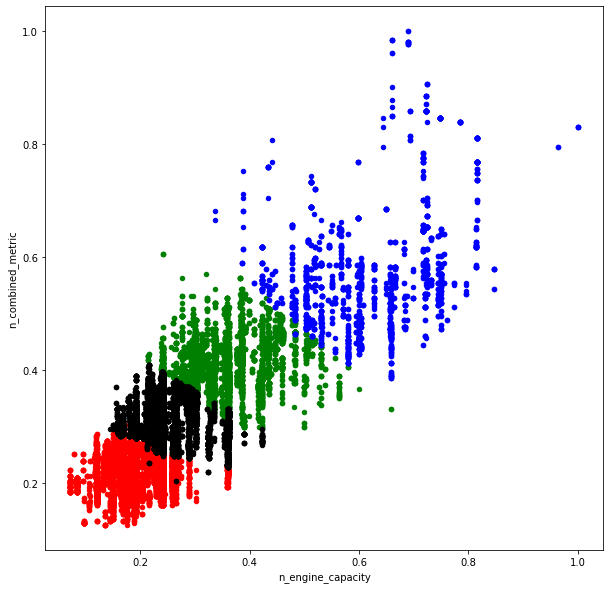

In [37]:
plot_2d_data_clusters(df[['n_engine_capacity', 'n_combined_metric']], df['class'])

#### Wykres przedstawiający zależność: emisja_co2-pojemmość_silnika w poszczególnych klastrach

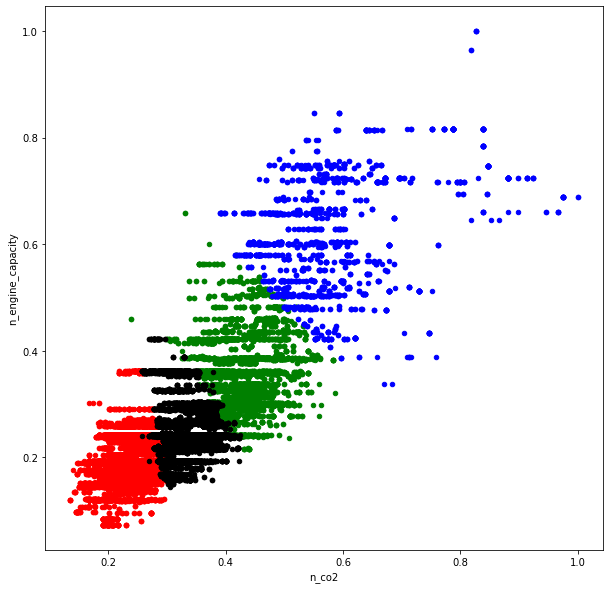

In [38]:
plot_2d_data_clusters(df[['n_co2', 'n_engine_capacity']], df['class'])

#### Wykres przedstawiający zależność:  spalnie_w_cyklu_mieszanym-emisja_co2 w poszczególnych klastrach

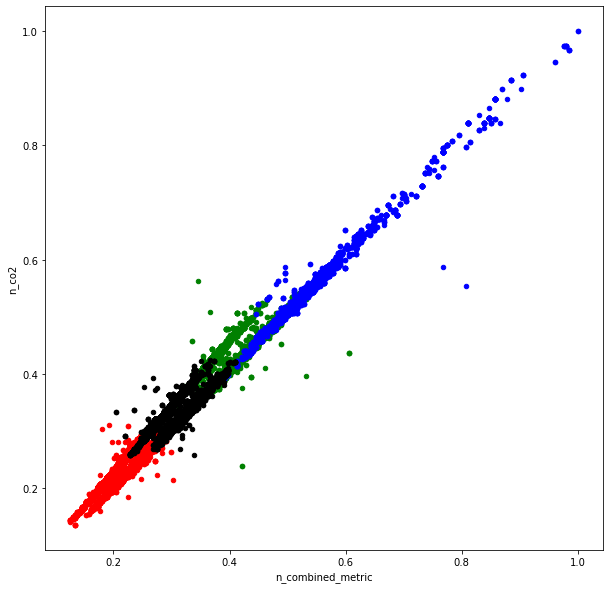

In [39]:
plot_2d_data_clusters(df[['n_combined_metric', 'n_co2']], df['class'])

### Zawartość klastrów i statystyki 

In [40]:
def print_fuel_type_statistics(data):
    petrol_proc = (len(data.loc[data['fuel_type'] == 'Petrol']) / len(data)) * 100
    diesel_proc = (len(data.loc[data['fuel_type'] == 'Diesel']) / len(data)) * 100
    print('Statistics for fuel_type')
    print('Procent of Petrol cars: {}%'.format(petrol_proc))
    print('Procent of Diesel cars: {}%'.format(diesel_proc))

In [41]:
def get_numeric_columns_headers(data):
    numeric_columns = []
    for (col_name, col_data) in data.iteritems():
        if pd.api.types.is_string_dtype(col_data):
            continue

        numeric_columns.append(col_name)

    return numeric_columns

In [42]:
def statistics_for_data_frame(data):
    numeric_headers = get_numeric_columns_headers
    df = data[numeric_headers]
    
    max_value_frame = pd.DataFrame(df.max(), columns=['max'])
    min_value_frame = pd.DataFrame(df.min(), columns=['min'])
    mean_value_frame = pd.DataFrame(df.mean(), columns=['mean'])
    median_value_frame = pd.DataFrame(df.median(), columns=['median'])
    std_dev_frame = pd.DataFrame(df.std(), columns=['std_dev'])
    
    frames = [max_value_frame, min_value_frame, mean_value_frame, median_value_frame, std_dev_frame]
    result = pd.concat(frames, axis=1)
    return result

#### klaster I

In [43]:
df_I = df.loc[df['class'] == 0]
df_I

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles,n_engine_capacity,n_combined_metric,n_co2,class
253,2000,Citroen,Xsara,Xsara 1.4i Estate,2,Manual,1360.0,Petrol,6.9,170,684.0,520.0,0.164152,0.271654,0.288136,0
21838,2007,Vauxhall,"New Astra, MY2006","1.7CDTi 16v 5 Door Estate with 15"" tyre",4,Manual,1686.0,Diesel,5.0,135,386.0,NaN,0.203500,0.196850,0.228814,0
22484,2008,Audi,A3 Sportback,2.0 TDI 170ps quattro with DPF,4,Manual,1968.0,Diesel,6.4,173,33.0,NaN,0.237538,0.251969,0.293220,0
24946,2008,Suzuki,Swift,1.5 GLX 5 Door Hatchback From VIN TSMMZC21S00...,4,Manual,1490.0,Petrol,6.2,150,469.0,NaN,0.179843,0.244094,0.254237,0
42033,2013,Citroen,C4,e-HDi 115 Airdream EGS6,5,Automatic,1560.0,Diesel,3.8,98,281.0,NaN,0.188292,0.149606,0.166102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12945,2005,Ford,Focus Pre-2004ﾽ Model Year,1.8 TDdi 3/5 Door Saloon/Estate (16 inch tyre)...,3,Manual,1753.0,Diesel,5.6,147,109.0,NaN,0.211587,0.220472,0.249153,0
3306,2001,Renault,Mégane Hatchback (all versions and trim levels),1.9 dCi (105 bhp) From VIN BA0505,3,Manual,1870.0,Diesel,5.2,139,488.0,392.0,0.225709,0.204724,0.235593,0
34060,2011,Audi,A4 Avant,2.0 TFSI 211PS,5,Manual,1984.0,Petrol,6.6,154,239.0,NaN,0.239469,0.259843,0.261017,0
26745,2009,Ford,"Focus, Post 2009ﾼ Model Year",1.6 Duratec (100PS) 3/4/5 Door Saloon,4,Manual,1596.0,Petrol,6.7,159,547.0,NaN,0.192637,0.263780,0.269492,0


In [44]:
stats = statistics_for_data_frame(df_I)
stats

,max,min,mean,median,std_dev
year,2013.000000,2000.000000,2008.788071,2010.000000,3.626573
euro_standard,6.000000,2.000000,4.274637,4.000000,0.804816
engine_capacity,2993.000000,599.000000,1667.923283,1598.000000,355.561030
combined_metric,7.700000,3.200000,5.638490,5.700000,0.812764
co2,183.000000,80.000000,141.920438,145.000000,17.845114
co_emissions,1733.000000,2.000000,286.233385,252.000000,181.305749
fuel_cost_6000_miles,572.000000,236.000000,427.025806,427.000000,52.604078
n_engine_capacity,0.361255,0.072299,0.201318,0.192879,0.042916
n_combined_metric,0.303150,0.125984,0.221988,0.224409,0.031999
n_co2,0.310169,0.135593,0.240543,0.245763,0.030246


In [45]:
print_fuel_type_statistics(df_I)

Statistics for fuel_type
Procent of Petrol cars: 41.14363885088919%
Procent of Diesel cars: 58.8563611491108%


#### klaster II

In [46]:
df_II = df.loc[df['class'] == 1]
df_II

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles,n_engine_capacity,n_combined_metric,n_co2,class
37585,2011,Volvo,"S80, Model Year 2012",T6 AWD Auto,5,Automatic,2953.0,Petrol,9.4,219,279.0,NaN,0.356427,0.370079,0.371186,1
7827,2003,Porsche,911,911 Carrera 4 Coupé,3,Manual,3596.0,Petrol,11.3,274,400.0,786.0,0.434037,0.444882,0.464407,1
26238,2009,BMW,3 Series E90/E91/E92/E93,335i Touring,4,Manual,2979.0,Petrol,9.3,222,474.0,NaN,0.359565,0.366142,0.376271,1
19738,2007,BMW,3 Series E90/E91/E92/E93,335i Touring,4,Automatic,2979.0,Petrol,9.8,235,339.0,NaN,0.359565,0.385827,0.398305,1
35464,2011,Lotus,Evora,Evora Sport Gearbox,5,Manual,3456.0,Petrol,9.5,224,151.0,NaN,0.417139,0.374016,0.379661,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20710,2007,Mercedes-Benz,C-Class Saloon (W203),C350 245 Tyres at rear,4,Automatic,3498.0,Petrol,10.0,239,210.0,NaN,0.422209,0.393701,0.405085,1
10001,2004,Land Rover,Defender Station Wagon,2.5 TD5 90 (2002 Model Year),3,Manual,2495.0,Diesel,10.0,282,300.0,723.0,0.301147,0.393701,0.477966,1
27682,2009,Mercedes-Benz,E-Class Saloon (W211),E350 CGI with 225 Tyres at rear,4,Automatic,3498.0,Petrol,8.7,208,77.0,NaN,0.422209,0.342520,0.352542,1
1861,2001,Audi,"Audi A6 Avant (SE, Sport & Quattro)",2.7 V6 Turbo Quattro (230 bhp),3,Automatic,2671.0,Petrol,12.4,298,814.0,897.0,0.322390,0.488189,0.505085,1


In [47]:
statistics_for_data_frame(df_II)

,max,min,mean,median,std_dev
year,2013.000000,2000.000000,2005.991938,2006.000000,3.505626
euro_standard,6.000000,2.000000,3.687853,4.000000,0.768962
engine_capacity,5461.000000,1781.000000,2932.277345,2967.000000,518.580029
combined_metric,15.400000,7.500000,10.283727,10.200000,1.126915
co2,346.000000,141.000000,250.715399,248.000000,25.200716
co_emissions,1985.000000,2.000000,394.462335,314.000000,281.413092
fuel_cost_6000_miles,3329.000000,517.000000,759.086370,750.000000,104.742701
n_engine_capacity,0.659143,0.214967,0.353926,0.358117,0.062593
n_combined_metric,0.606299,0.295276,0.404871,0.401575,0.044367
n_co2,0.586441,0.238983,0.424941,0.420339,0.042713


In [48]:
print_fuel_type_statistics(df_II)

Statistics for fuel_type
Procent of Petrol cars: 78.24509540446117%
Procent of Diesel cars: 21.754904595538836%


#### klaster III

In [49]:
df_III = df.loc[df['class'] == 2]
df_III

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles,n_engine_capacity,n_combined_metric,n_co2,class
6053,2003,Aston Martin Lagonda,DB7,DB7 Vantage (Coupé & Convertible),3,Automatic,5935.0,Petrol,19.7,472,800.0,1373.0,0.716355,0.775591,0.800000,2
35933,2011,Mercedes-Benz,"S-Class Limousine, Model Year 2011","S 500 with 19"" & 20"" rear wheels",5,Automatic,5461.0,Petrol,11.3,264,470.0,NaN,0.659143,0.444882,0.447458,2
22816,2008,BMW,5 Series E60/E61,550i Touring,4,Automatic,4799.0,Petrol,10.7,254,271.0,NaN,0.579240,0.421260,0.430508,2
7432,2003,Mercedes-Benz,S Class (V220) Pullman,S 500,3,Automatic,4966.0,Petrol,11.4,270,300.0,792.0,0.599396,0.448819,0.457627,2
19861,2007,Cadillac,SRX,4.6 - V8 AUT (07MY),4,Automatic,4565.0,Petrol,13.2,314,437.0,NaN,0.550996,0.519685,0.532203,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39166,2012,Lexus,IS F MY2012,ISF,5,Automatic,4969.0,Petrol,11.6,270,117.0,NaN,0.599759,0.456693,0.457627,2
14186,2005,Porsche,911 (Type 996),911 Turbo S Cabriolet Tiptronic S,3,Automatic,3600.0,Petrol,14.2,345,704.0,NaN,0.434520,0.559055,0.584746,2
3955,2002,Audi,A6 Saloon (SE & Sport),4.2 V8 Sport & Quattro (300 bhp),4,Automatic,4172.0,Petrol,13.1,314,419.0,909.0,0.503561,0.515748,0.532203,2
33987,2011,Aston Martin Lagonda,"V8 Vantage S, 2011MY",Hatchback & Convertible,5,Automatic,4735.0,Petrol,12.9,299,529.0,NaN,0.571515,0.507874,0.506780,2


In [50]:
statistics_for_data_frame(df_III)

,max,min,mean,median,std_dev
year,2013.0,2000.000000,2006.887393,2007.000000,3.662901
euro_standard,6.0,2.000000,3.808434,4.000000,0.816460
engine_capacity,8285.0,2790.000000,5064.292059,4966.000000,872.015620
combined_metric,25.4,9.800000,14.349529,13.900000,2.704700
co2,590.0,230.000000,340.557649,328.000000,62.382161
co_emissions,2000.0,2.000000,514.608476,417.000000,338.928814
fuel_cost_6000_miles,1934.0,706.000000,1062.254019,988.500000,241.288836
n_engine_capacity,1.0,0.336753,0.611260,0.599396,0.105252
n_combined_metric,1.0,0.385827,0.564942,0.547244,0.106484
n_co2,1.0,0.389831,0.577216,0.555932,0.105732


In [51]:
print_fuel_type_statistics(df_III)

Statistics for fuel_type
Procent of Petrol cars: 98.87842081650965%
Procent of Diesel cars: 1.1215791834903546%


#### klaster IV

In [52]:
df_IV = df.loc[df['class'] == 3]
df_IV

,year,manufacturer,model,description,euro_standard,transmission_type,engine_capacity,fuel_type,combined_metric,co2,co_emissions,fuel_cost_6000_miles,n_engine_capacity,n_combined_metric,n_co2,class
2022,2001,Citroen,C5,C5 1.8 16v,3,Automatic,1749.0,Petrol,8.4,201,948.0,609.0,0.211104,0.330709,0.340678,3
31160,2010,Mazda,Mazda3,MPS,5,Manual,2261.0,Petrol,9.6,224,621.8,NaN,0.272903,0.377953,0.379661,3
31415,2010,Mercedes-Benz,C-Class (204) Saloon Model Year 2009,C 180 BlueEFFICIENCY 225/245 Tyres at rear,4,Automatic,1597.0,Petrol,7.4,176,335.0,NaN,0.192758,0.291339,0.298305,3
13374,2005,Mazda,Mazda6,2.0 TD 136 PS 4/5 Door,4,Manual,1998.0,Diesel,6.5,174,349.0,NaN,0.241159,0.255906,0.294915,3
3811,2001,Volkswagen,Sharan,1.9 TDI PD (115 bhp),3,Automatic,1896.0,Diesel,7.8,211,159.0,588.0,0.228847,0.307087,0.357627,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13182,2005,Honda,HONDA S2000,2.0i VTEC,3,Manual,1997.0,Petrol,10.0,237,1022.0,NaN,0.241038,0.393701,0.401695,3
3693,2001,Volkswagen,Bora,1.9 TDI PD (130 bhp),3,Automatic,1896.0,Diesel,6.6,178,33.0,497.0,0.228847,0.259843,0.301695,3
13948,2005,MG Rover Group,Rover 75 Tourer,1.8 (from VIN RJ255552),3,Automatic,1796.0,Petrol,9.4,224,547.0,NaN,0.216777,0.370079,0.379661,3
12451,2005,BMW,3 Series E46,318d Touring,3,Automatic,1995.0,Diesel,7.0,188,83.0,NaN,0.240797,0.275591,0.318644,3


In [53]:
statistics_for_data_frame(df_IV)

,max,min,mean,median,std_dev
year,2013.000000,2000.000000,2006.339384,2006.000000,3.676068
euro_standard,6.000000,2.000000,3.775616,4.000000,0.804194
engine_capacity,3498.000000,1199.000000,2027.148170,1991.000000,371.370349
combined_metric,10.400000,5.200000,7.933099,7.900000,0.854592
co2,250.000000,152.000000,194.819665,192.000000,18.048152
co_emissions,1909.000000,3.000000,405.123557,359.000000,275.038490
fuel_cost_6000_miles,860.000000,417.000000,588.699763,584.000000,63.107304
n_engine_capacity,0.422209,0.144719,0.244677,0.240314,0.044824
n_combined_metric,0.409449,0.204724,0.312327,0.311024,0.033645
n_co2,0.423729,0.257627,0.330203,0.325424,0.030590


In [54]:
print_fuel_type_statistics(df_IV)

Statistics for fuel_type
Procent of Petrol cars: 70.25956364926388%
Procent of Diesel cars: 29.740436350736122%


## Klasyfikacja

Do przeprowadzenia procedury klasyfikacji skorzystamy z metody <b>k-Fold Cross-Validation</b> (dla k=10).

Klasyfikator jakiego użyjemy to zalecany na wykładzie <b>naiwny klasyfikator bayesowski (Naive Bayes)</b>.

#### Jeszcze raz tasujemy zbiór

In [55]:
df = df.sample(frac = 1)

### Podział zbioru na 'k' podzbiorów

In [56]:
k=10

In [57]:
from sklearn.model_selection import KFold

X = df[['engine_capacity', 'combined_metric', 'co2']].to_numpy()
Y = df[['class']].to_numpy()

kf = KFold(n_splits=k)

### Przeprowadzenie klasyfikacji przy pomocy naiwnego klasyfikatora bayesowskiego

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

conf_mtx = np.array([[0] * num_of_clusters] * num_of_clusters, np.int32)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index].transpose()[0], Y[test_index].transpose()[0]

    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    classified = clf.predict(X_test)
    
    conf_mtx = conf_mtx + confusion_matrix(Y_test, classified)

conf_mtx = (conf_mtx / len(df)) * 100
diag_sum = 0
for i in range(len(conf_mtx)):
    diag_sum = diag_sum + conf_mtx[i][i]
    
diag_sum

96.54472903988051

### Macierz pomyłek klasyfikatora bayesowskiego

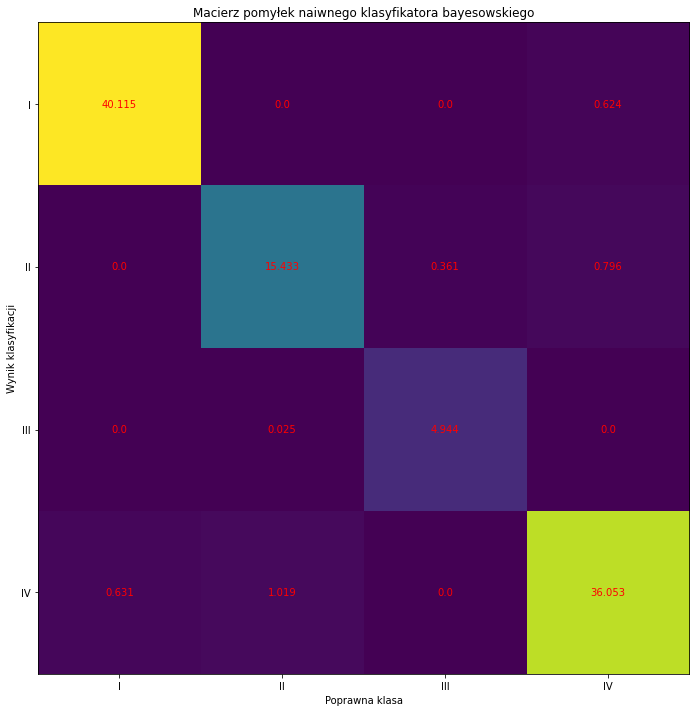

In [59]:
fig, ax = plt.subplots()
im = ax.imshow(conf_mtx)

classes = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII']

ax.set_xticks(np.arange(num_of_clusters))
ax.set_yticks(np.arange(num_of_clusters))
ax.set_xticklabels(classes[0:num_of_clusters])
ax.set_yticklabels(classes[0:num_of_clusters])

for i in range(num_of_clusters):
    for j in range(num_of_clusters):
        text = ax.text(j, i, round(conf_mtx[i, j], 3),
                       ha="center", va="center", color="r")

ax.set_ylabel('Wynik klasyfikacji')
ax.set_xlabel('Poprawna klasa')
ax.set_title("Macierz pomyłek naiwnego klasyfikatora bayesowskiego")
fig.tight_layout()
plt.show()

### Przeprowadzenie klasyfikacji przy pomocy klasyfikatora n-najbliższych sąsiadów (n=3)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

df = df.sample(frac = 1)

X = df[['engine_capacity', 'combined_metric', 'co2']].to_numpy()
Y = df[['class']].to_numpy()

kf = KFold(n_splits=3)

conf_mtx = np.array([[0] * num_of_clusters] * num_of_clusters, np.int32)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index].transpose()[0], Y[test_index].transpose()[0]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, Y_train)
    classified = clf.predict(X_test)
    
    conf_mtx = conf_mtx + confusion_matrix(Y_test, classified)

conf_mtx = (conf_mtx / len(df)) * 100
diag_sum = 0
for i in range(len(conf_mtx)):
    diag_sum = diag_sum + conf_mtx[i][i]
    
diag_sum

99.49396999487283

### Macierz pomyłek klasyfikatora n-najbliższych sąsiadów

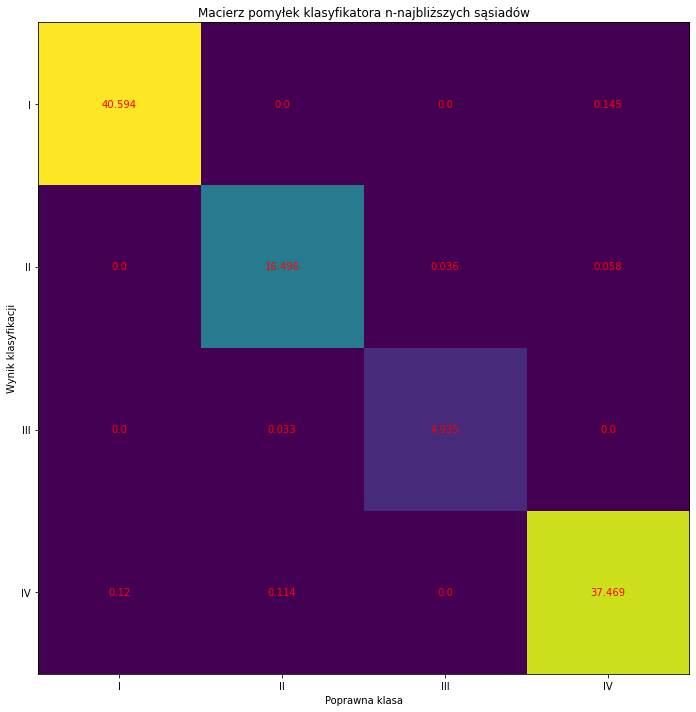

In [61]:
fig, ax = plt.subplots()
im = ax.imshow(conf_mtx)

classes = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII']

ax.set_xticks(np.arange(num_of_clusters))
ax.set_yticks(np.arange(num_of_clusters))
ax.set_xticklabels(classes[0:num_of_clusters])
ax.set_yticklabels(classes[0:num_of_clusters])

for i in range(num_of_clusters):
    for j in range(num_of_clusters):
        text = ax.text(j, i, round(conf_mtx[i, j], 3),
                       ha="center", va="center", color="r")

ax.set_ylabel('Wynik klasyfikacji')
ax.set_xlabel('Poprawna klasa')
ax.set_title("Macierz pomyłek klasyfikatora n-najbliższych sąsiadów")
fig.tight_layout()
plt.show()